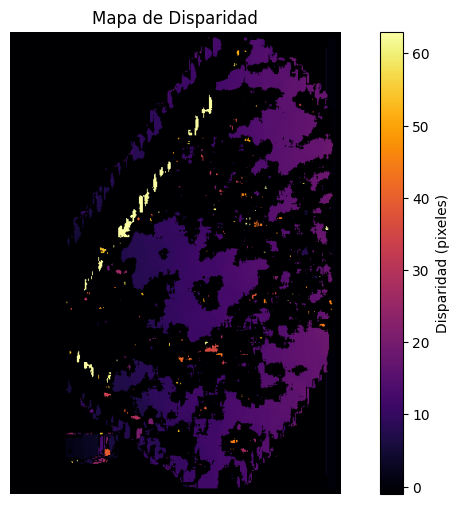

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

imgL = cv2.imread('left_image.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right_image.jpg', cv2.IMREAD_GRAYSCALE)
height = min(imgL.shape[0], imgR.shape[0])
width = min(imgL.shape[1], imgR.shape[1])
imgL = cv2.resize(imgL, (width, height))
imgR = cv2.resize(imgR, (width, height))

# Verificar que se hayan cargado correctamente
assert imgL is not None and imgR is not None, "Error: Imágenes no encontradas."

# Calcular el mapa de disparidad con StereoBM
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

# Visualizar el mapa de disparidad
os.makedirs("resultados", exist_ok=True)
plt.figure(figsize=(10, 6))
plt.imshow(disparity, cmap='inferno')
plt.colorbar(label='Disparidad (pixeles)')
plt.title("Mapa de Disparidad")
plt.axis('off')
plt.savefig("resultados/disparidad.png")
plt.show()

# Simular mapa de profundidad (inverso de la disparidad)
depth_map = 1.0 / (disparity + 1e-6)  # Evitar división por cero
depth_map[depth_map > 100] = 100     # Recorte para visualización

# Crear malla 3D del terreno con Plotly
x, y = np.meshgrid(np.arange(depth_map.shape[1]), np.arange(depth_map.shape[0]))

# Crear figura 3D con textura (imagen izquierda como escala de grises)
fig = go.Figure(data=[go.Surface(z=depth_map, x=x, y=y, surfacecolor=imgL, colorscale='gray')])
fig.update_layout(
    title='Terreno Simulado a partir de Disparidad Estéreo',
    autosize=False,
    width=800,
    height=600,
    scene=dict(zaxis=dict(range=[0, 100]))
)

# Mostrar la figura
fig.show()
fig.write_html("resultados/malla_3d.html")
